# 준비

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sampleSubmission.csv")

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


* datatime : 1시간 간격
* season : 1-봄, 2-여름, 3-가을, 4-겨울
* holiday : 1-공휴일
* workingday : 1-근무일, 0-주말과 공휴일이 아님
* weather : 1-맑음, 2-약간 흐림, 3-약한 비, 4-폭우
* temp, atemp : 실제온도, 체감온도
* humidity : 상대습도
* windspeed : 풍속
* casual : 비회원 수
* registered : 회원 수
* count : 자전거 대여 수량

In [4]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


* casual, registered 특성 없음

In [5]:
print(submission.shape)
submission.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 데이터 전처리 1단계

## 날짜, 년 월 일 요일 칼럼 생성

In [8]:
train.datetime[1].split()[0].split("-")

['2011', '01', '01']

In [9]:
train.datetime[1].split()[1].split(":")

['01', '00', '00']

In [10]:
train["date"] = train["datetime"].apply(lambda x: x.split()[0])

train["year"] = train["datetime"].apply(lambda x: x.split()[0].split("-")[0])
train["month"] = train["datetime"].apply(lambda x: x.split()[0].split("-")[1])
train["day"] = train["datetime"].apply(lambda x: x.split()[0].split("-")[2])
train["hour"] = train["datetime"].apply(lambda x: x.split()[1].split(":")[0])

In [11]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02


In [13]:
from datetime import datetime
import calendar

In [14]:
datetime.strptime(train["date"][0], "%Y-%m-%d")

datetime.datetime(2011, 1, 1, 0, 0)

In [15]:
datetime.strptime(train["date"][0], "%Y-%m-%d").weekday()

5

In [16]:
calendar.day_name[datetime.strptime(train["date"][0], "%Y-%m-%d").weekday()]

'Saturday'

In [17]:
train["weekday"] = train["date"].apply(lambda x: calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])

In [18]:
train["season"] = train["season"].map({1:"Spring", 2:"Summer",3:"Fall", 4:"Winter"})
train["weather"] = train["weather"].map({1:"Clear", 2:"Clouds",3:"Rain", 4:"Heavy Rain"})

In [19]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday


# 데이터 시각화

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
sns.set(rc = {"figure.figsize" : (15,9)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정

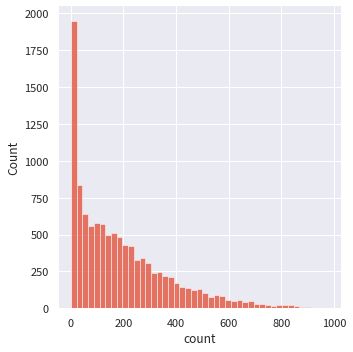

In [22]:
sns.displot(train["count"])

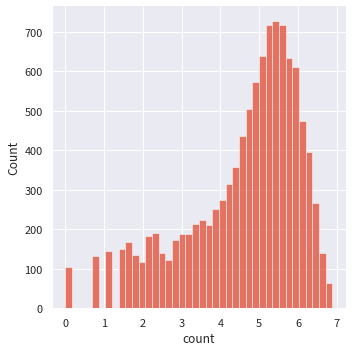

In [23]:
sns.displot(np.log(train["count"]))

* 타겟값을 count 가 아닌 log(count)를 사용

[Text(0.5, 1.0, 'Rental amounts by hour')]

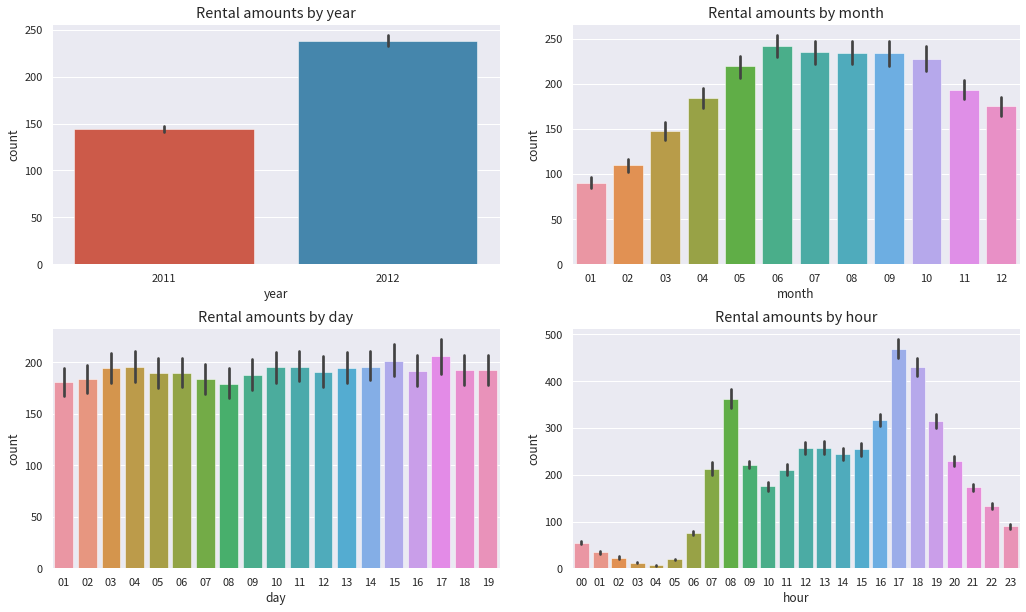

In [24]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout(pad=4)

sns.barplot(x="year", y="count", data=train, ax=axes[0,0])
sns.barplot(x="month", y="count", data=train, ax=axes[0,1])
sns.barplot(x="day", y="count", data=train, ax=axes[1,0])
sns.barplot(x="hour", y="count", data=train, ax=axes[1,1])

axes[0,0].set(title = "Rental amounts by year")
axes[0,1].set(title = "Rental amounts by month")
axes[1,0].set(title = "Rental amounts by day")
axes[1,1].set(title = "Rental amounts by hour")

* day 특성 제거

[Text(0.5, 1.0, 'Box Plot on count across workingday')]

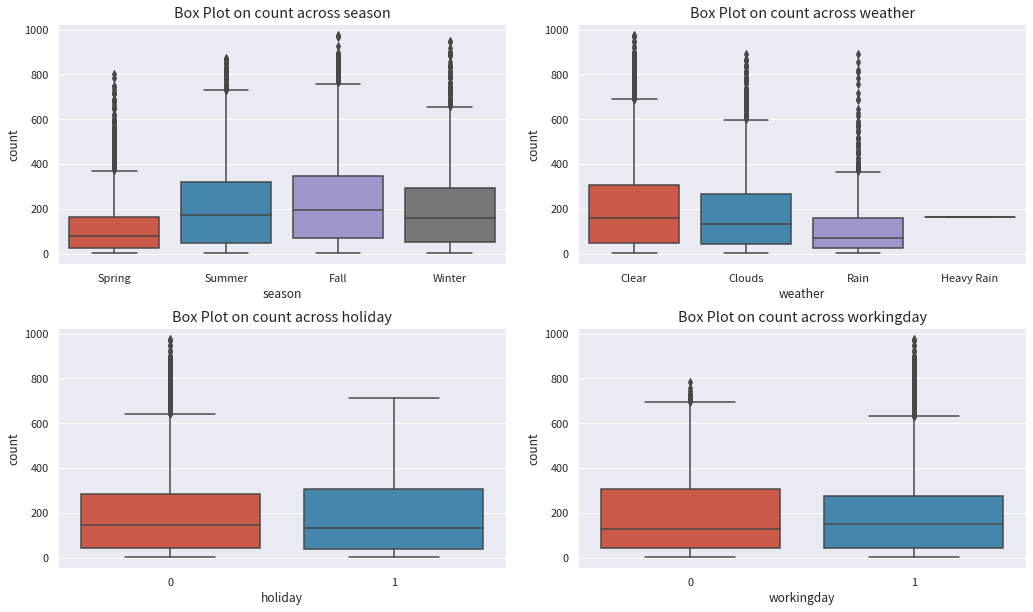

In [25]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout(pad=4)

sns.boxplot(x="season", y="count", data=train, ax=axes[0,0])
sns.boxplot(x="weather", y="count", data=train, ax=axes[0,1])
sns.boxplot(x="holiday", y="count", data=train, ax=axes[1,0])
sns.boxplot(x="workingday", y="count", data=train, ax=axes[1,1])

axes[0,0].set(title = "Box Plot on count across season")
axes[0,1].set(title = "Box Plot on count across weather")
axes[1,0].set(title = "Box Plot on count across holiday")
axes[1,1].set(title = "Box Plot on count across workingday")

In [ ]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)
plt.tight_layout()

sns.pointplot(x="hour", y="count", data=train, hue="workingday", ax=axes[0])
sns.pointplot(x="hour", y="count", data=train, hue="holiday", ax=axes[1])
sns.pointplot(x="hour", y="count", data=train, hue="weekday", ax=axes[2])
sns.pointplot(x="hour", y="count", data=train, hue="season", ax=axes[3])
sns.pointplot(x="hour", y="count", data=train, hue="weather", ax=axes[4])

* weather == 4 인 데이터를 제거

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout(pad=3)

sns.regplot(x="temp", y="count", data=train, ax=axes[0,0], scatter_kws={"alpha":0.2}, line_kws={"color":"darkblue"})
sns.regplot(x="atemp", y="count", data=train, ax=axes[0,1], scatter_kws={"alpha":0.2}, line_kws={"color":"darkblue"})
sns.regplot(x="windspeed", y="count", data=train, ax=axes[1,0], scatter_kws={"alpha":0.2}, line_kws={"color":"darkblue"})
sns.regplot(x="humidity", y="count", data=train, ax=axes[1,1], scatter_kws={"alpha":0.2}, line_kws={"color":"darkblue"})

In [ ]:
corrMatrix = train[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
fig, ax = plt.subplots()

sns.heatmap(corrMatrix, annot=True)
ax.set(title="Heatmap of Numerical Data")

* windspeed 특성 삭제

# 데이터 전처리 2단계

In [21]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sampleSubmission.csv")

In [22]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## 이상치 제거

In [23]:
train = train[train["weather"] != 4]

In [24]:
all_data = pd.concat([train, test], axis=0, ignore_index=True)

In [25]:
all_data.shape

(17378, 12)

## 특성 변환 ( 날짜 / 시간 / 요일 )

In [26]:
all_data["date"] = all_data["datetime"].apply(lambda x: x.split()[0])
all_data["year"] = all_data["datetime"].apply(lambda x: x.split()[0].split("-")[0])
all_data["month"] = all_data["datetime"].apply(lambda x: x.split()[0].split("-")[1])
all_data["hour"] = all_data["datetime"].apply(lambda x: x.split()[1].split(":")[0])
all_data["weekday"] = all_data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday())

In [27]:
all_data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,01,02,5


## 범주형데이터 encoding

관련한 one-hot-encoding 방법이 있는걸 알지만 아직 안배움..

In [ ]:
# all_data["season"] = all_data["season"].apply(lambda x: "season_" + str(x))
# all_data["weather"] = all_data["weather"].apply(lambda x: "weather_" + str(x))
# all_data["weekday"] = all_data["weekday"].apply(lambda x: "weekday_" + str(x))

In [ ]:
# all_data = pd.concat( [all_data, pd.get_dummies(all_data["season"])], axis=1)
# all_data = pd.concat( [all_data, pd.get_dummies(all_data["weather"])], axis=1)
# all_data = pd.concat( [all_data, pd.get_dummies(all_data["weekday"])], axis=1)

In [ ]:
all_data.head(3)

## 연속형 데이터 표준화

In [ ]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# all_data["temp"] = ss.fit_transform(all_data[["temp"]])
# all_data["atemp"] = ss.fit_transform(all_data[["atemp"]])
# all_data["humidity"] = ss.fit_transform(all_data[["humidity"]])

In [28]:
all_data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,01,02,5


## 칼럼 정리

In [ ]:
all_data.info()

In [29]:
# drop_col = ["datetime","season", "weather", "weekday","windspeed","date","casual","registered", "season_1", "weather_1", "weekday_0"]
drop_col = ["datetime","windspeed","date","casual","registered", "month"]
all_data = all_data.drop(drop_col, axis=1)

In [30]:
all_data.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,00,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,02,5


* year는 2011, 2012, month 1~12, hour 0~23  인데 이걸 명목으로 나누는게 맞는지 잘 모르겠음

# 데이터 셋 나누기

In [31]:
train = all_data[~pd.isnull(all_data["count"])]
test = all_data[pd.isnull(all_data["count"])]

target = train["count"]

train = train.drop(["count"], axis=1)
test = test.drop(["count"], axis=1)


# 평가지표 계산 함수

In [33]:
import numpy as np

def rmsle(target, pred, convertExp=True):
    if convertExp:
        target = np.exp(target)
        pred = np.exp(pred)
        
    log_target = np.nan_to_num(np.log(target+1))
    log_pred = np.nan_to_num(np.log(pred+1))
    
    output = np.sqrt(np.mean( (log_target - log_pred)**2) )
    return output

# 베이스라인 모델 제작

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

log_target = np.log(target)
lr.fit(train, log_target)

LinearRegression()

In [39]:
preds = lr.predict(train)

In [40]:
rmsle(log_target, preds)

1.0204980189305044

In [41]:
lr_preds = lr.predict(test)
submission["count"] = np.exp(lr_preds)
submission.to_csv("submission.csv", index=False)

캐글 1.03162 점

# 성능개선

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

rf_params = {"n_estimators" : [140], "random_state" : [42]}
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=rf_params,
                      scoring=rmsle,
                      cv=5)

grid_rf.fit(train, log_target)
print(grid_rf.best_params_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\AppData\Local\Temp/ipykernel_14316/1588986620.py", line 4, in rmsle
    if convertExp:
  File "C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py", line 1537, in __nonzero__
    raise ValueError(
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  Fil

{'n_estimators': 140, 'random_state': 42}


In [46]:
preds=grid_rf.best_estimator_.predict(train)

print(rmsle(log_target, preds, True))

0.11265875245404895


In [47]:
rf_preds = grid_rf.best_estimator_.predict(test)

submission["count"] = np.exp(rf_preds)
submission.to_csv("submission.csv", index=False)